In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# TF includes higher-level NN API (tf.keras), which provides 
# useful abstractions to reduce boilerplate.
# However, this tutorial covers NN training from first
# principle.

In [3]:
# Setup
from __future__ import absolute_import, division,\
    print_function, unicode_literals

In [4]:
import tensorflow as tf

In [5]:
tf.enable_eager_execution()

In [6]:
# Variables
# Tensors in TF: immutable stateless objects.
# ML models: must have changing state. As your model trains,
# the same code to compute predictions should behave differently
# over time.

In [7]:
# Use Python state
x = tf.zeros([10,10])

In [8]:
x += 2

In [9]:
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [10]:
# TF has stateful operations built in.
# To represent weights in a model, it's often convenient and
# efficient to use TF variables.
# A Variable is an object which stores a value and, when used in
# a TF computation, will implicitly read from this stored value.
# There are operations (tf.assign_sub, tf.scatter_update, etc.)
# which manipulate the value stored in a TF variable.

In [11]:
v = tf.Variable(1.0)

In [12]:
v.numpy()

1.0

In [13]:
# Reassign the value
v.assign(3.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [14]:
v.numpy()

3.0

In [15]:
# Use 'v' in a TF operation like tf.square() and reassign
v.assign(tf.square(v))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=9.0>

In [16]:
v.numpy()

9.0

In [17]:
# Computations using Variables are automatically traced when
# computing gradients. 
# For Variables representing embeddings TF will do sparse updates
# by default, which are more computation and memory efficient.
# Using Variables is also a way to quickly let a reader of your
# code know that this piece of state is mutable.

In [19]:
# Example: Fitting a Linear Model
# 1. Define the model.
# 2. Define a loss function.
# 3. Obtain training data.
# 4. Run through the training data and use an optimizer to adjust
# the variables to fit the data.

In [20]:
# 1. Define the model.
class Model(object):
    def __init__(self):
        # Initialize variables to (5.0, 0.0)
        # In practice, these should be initialized to random
        # values.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

In [21]:
model = Model()

In [23]:
model(3.0).numpy()

15.0

In [24]:
# 2. Define a loss function.
def loss(predicted_y, desired_y):
    # Standard L2 loss
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [25]:
# 3. Obtain training data.
# Let's synthesize the training data with some noise.
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

In [26]:
inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [28]:
# Before we train the model, visualize where the model stands
# right now.
from matplotlib import pyplot as plt

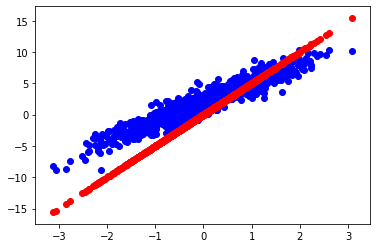

In [29]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [30]:
print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

Current loss: 
8.906173


In [31]:
# 4. Define a training loop.
# Train the network by using the training data to update the
# model's variables, W and b, so that the loss decreases, by using
# gradient descent.
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [32]:
# Repeatedly run through the training data and see how W and b
# evolve.
model = Model()

In [33]:
# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %\
         (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=5.00 b=0.00, loss=8.90617
Epoch  1: W=4.61 b=0.41, loss=6.04024
Epoch  2: W=4.30 b=0.73, loss=4.21554
Epoch  3: W=4.05 b=0.99, loss=3.05368
Epoch  4: W=3.85 b=1.20, loss=2.31381
Epoch  5: W=3.69 b=1.36, loss=1.84261
Epoch  6: W=3.56 b=1.49, loss=1.54250
Epoch  7: W=3.45 b=1.59, loss=1.35132
Epoch  8: W=3.37 b=1.67, loss=1.22954
Epoch  9: W=3.30 b=1.74, loss=1.15194


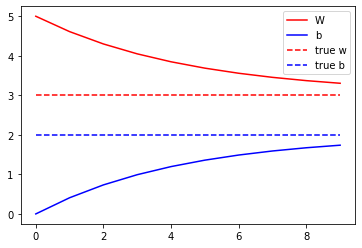

In [35]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', \
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W','b','true w', 'true b'])
plt.show()